# The Metropolitan Museum of Art Open Access

## Framing the Problem

## Obtaining Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 43 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Period                     0 non-null float64
Dynasty                    0 non-null float64
Reign                      0 non-null float64
Portfolio                  0 non-null float64
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Suffix              9 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Art

In [5]:
data.shape

(1924, 43)

## Analysing Data

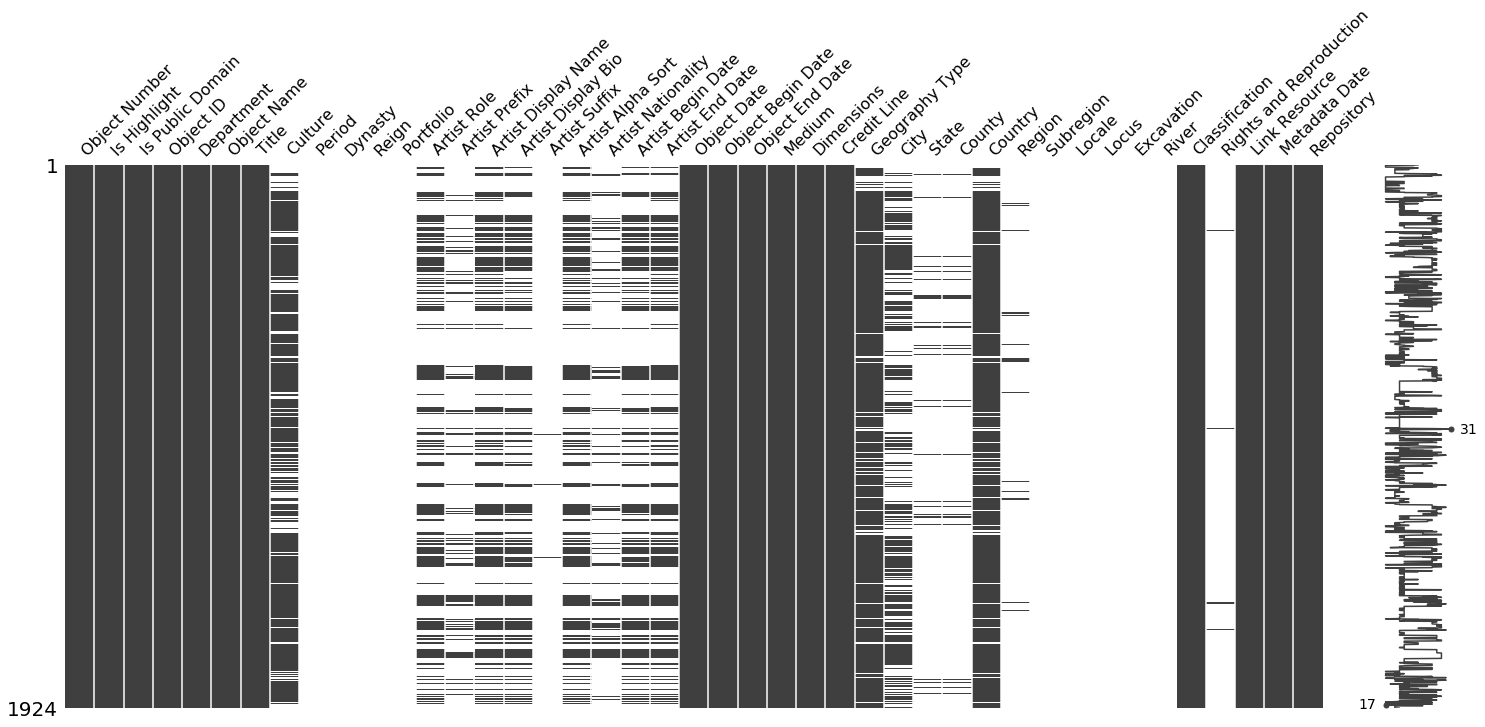

In [6]:
ms.matrix(data)

In [7]:
data.drop(['Period', 'Dynasty', 'Reign','Portfolio','Subregion','Locale','Locus','Excavation','River'], axis=1, inplace=True)

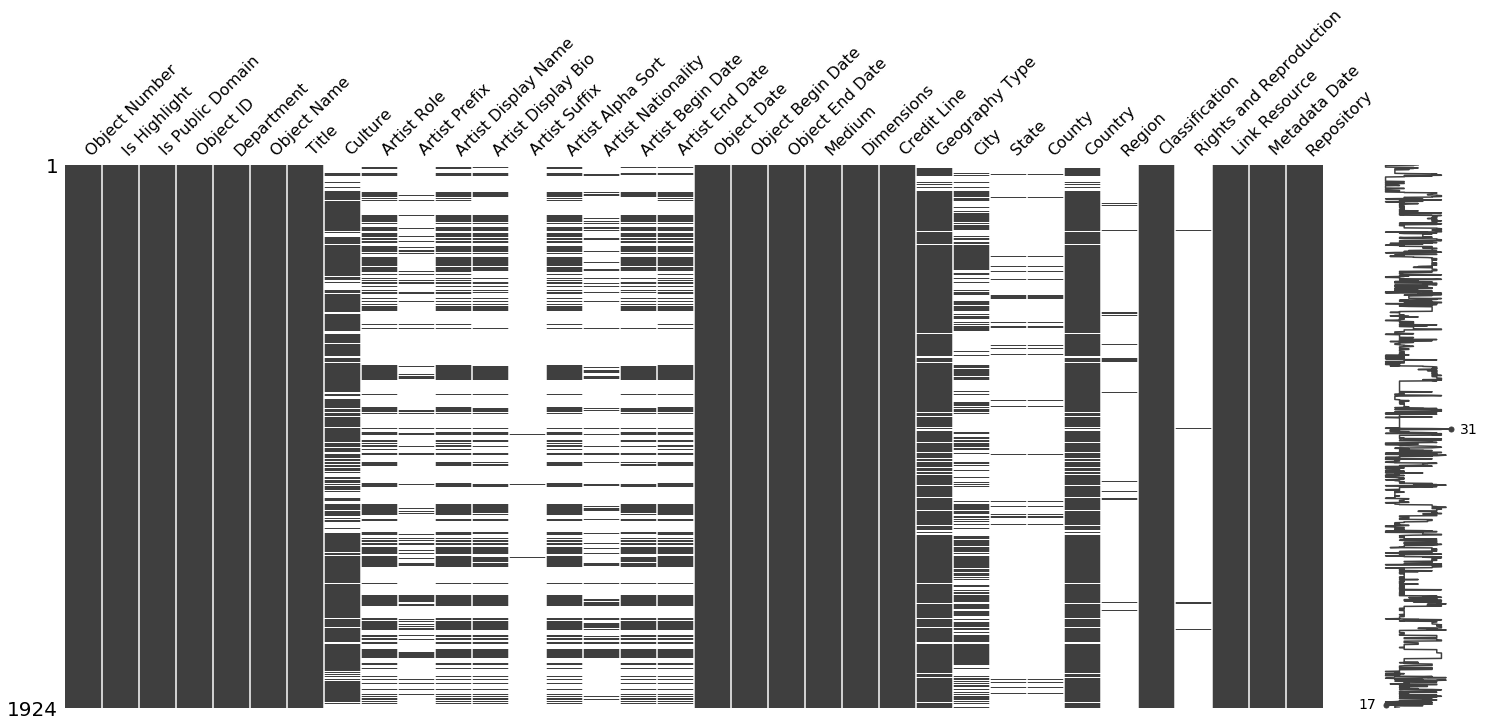

In [8]:
ms.matrix(data)

In [9]:
data['Artist Suffix'].value_counts()

or           8
Tradition    1
Name: Artist Suffix, dtype: int64

In [10]:
data.drop('Artist Suffix', axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 33 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null in

In [12]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
British, probably                 21
Mexican                           21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
French                             4
American, Japanese                 4
American, probably                 2
Dutch                              2
Bermudian, possibly                2
Spanish                            2
British or Flemish                 2
Venezuelan                         1
German                             1
French, possibly                   1
Irish                              1
Canadian                           1
Dutch, probably                    1
American or Irish                  1
N

In [13]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
British, probably                 21
Mexican                           21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
French                             4
American, Japanese                 4
American, probably                 2
Dutch                              2
Bermudian, possibly                2
Spanish                            2
British or Flemish                 2
Venezuelan                         1
German                             1
French, possibly                   1
Irish                              1
Canadian                           1
Dutch, probably                    1
American or Irish                  1
N

In [14]:
data.groupby(['Culture','Object Name']).count()

Object Number  \
Culture                      Object Name                             
American                     Advertisement                       1   
                             Ale glass                           2   
                             Andiron                            26   
                             Architectural elements              2   
                             Armchair                           89   
                             Astral lamp                         2   
                             Aviary                              1   
                             Baby's bottle                       1   
                             Baking dish                         1   
                             Balcony                             1   
                             Ball                                2   
                             Baluster                            7   
                             Banister-back armchair              1   
                             Banister-back chair                 1   
                             Banjo clock                         3   
                             Bank                                1   
                             Baptismal bowl                      1   
                             Baptismal certificate               1   
                             Basin                              16   
                             Basin Stand                         3   
                             Basin stand                         1   
                             Basket                              2   
                             Beaker                             42   
                             Bean pot                            1   
                             Bedstead                            9   
                             Bell                                2   
                             Bell pull                           1   
                             Bellows                             1   
                             Bench                               5   
                             Berry dish                          1   
...                                                            ...   
British, probably            Candlestick and shade               2   
Canadian                     Armchair                            1   
Chinese                      Basin                               1   
                             Bottle                              1   
                             Bowl                               12   
                             Bulb pot                            2   
                             Candlestick                         3   
                             Vase                                5   
Chinese, for American market Bowl                               41   
                             Bread plate                        36   
                             Candle stand                        1   
Dutch                        Apothecary jar                      2   
Dutch, probably              Bench                               1   
European                     Bride box                           4   
                             Oil cruet                           1   
French                       Armchair                            1   
                             Box                                 1   
                             Locket                              1   
                             Tumbler                             1   
French, possibly             Slop bowl                           1   
German                       Chocolate pot                       1   
Irish                        Chandelier                          1   
Mexican                      Baptismal basin                     1   
                             Basin                               2   
                             Bottle                            

In [15]:
data.set_index(data['Object Name'], inplace=True)

In [16]:
data['Culture'].fillna(method='ffill', inplace=True)
data['Culture'].fillna(method='bfill', inplace=True)

In [17]:
data.reset_index(drop=True, inplace=True)

In [18]:
data['Culture'].value_counts()

American                        1489
British                          104
Chinese, for American market      83
American, Shaker                  40
Mexican                           33
British (American market)         33
American or British               32
British, probably                 30
Chinese                           24
American or French                 9
British, possibly                  6
British or Flemish                 6
British or Irish                   5
French                             5
European                           5
American, Japanese                 4
Dutch                              2
Irish                              2
Bermudian, possibly                2
American, probably                 2
Spanish                            2
German                             1
French, possibly                   1
Venezuelan                         1
Canadian                           1
Dutch, probably                    1
American or Irish                  1
N

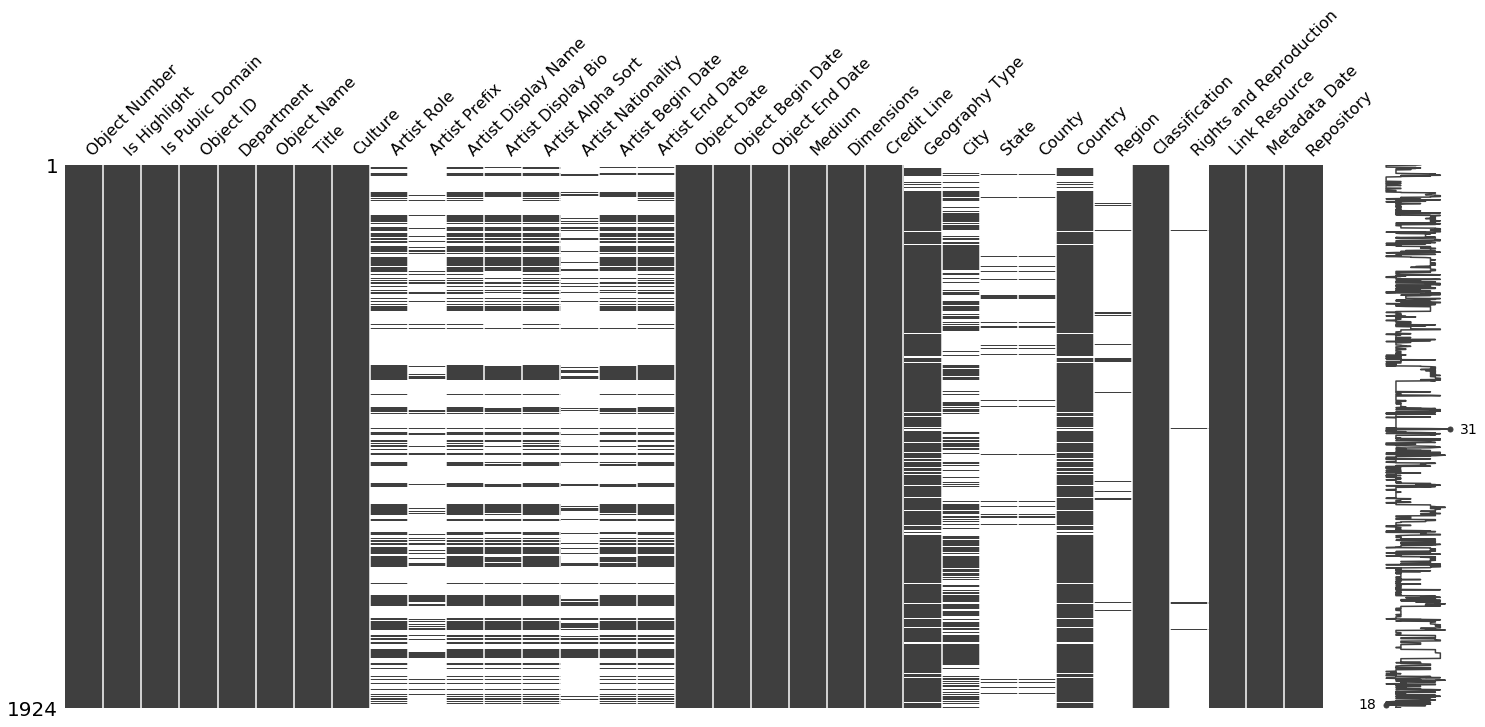

In [19]:
ms.matrix(data)